
# Looking  at Trends

Finalizing how to represent trends for our MVP. I'm looking to draw specific slopes that will ultimately be positive or negative enough to be useful in predicting the change 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

/home/mackenzie/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)
    return data

In [8]:
cleans = cleanData(result)

Now that we've cleaned everything and have it ready to go, I want to generate a 2D representation for life expectancy across age groups. To test I'm going to set up A couple short graphs to draw lines of best fit. I realized from my last, 3D representation that there was just too much going on for the visuals to be quickly understood. My ultimate goal here is to make something that is easily interpretable and still informs the viewer. Right now, I'm thinking that this could "Change the World" by raising awareness of the unequal living conditions around the world (this should be reflected in life expectancy)

In [9]:
def regionSeparate(region,cat,age):
    #select category values
    lifeExpec=result[result.GHO==cat]
    #filter for region
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    # only looking at both sexes life expectancy
    bSexLE= regionOnly[regionOnly.SEX == 2]
    #filter by age groups 
    agefilt = bSexLE[bSexLE.AGEGROUP== age]
    return agefilt

In [25]:
cat =35
age =100
afdf = regionSeparate('AFR',cat,age)
amdf = regionSeparate('AMR',cat,age)
emdf = regionSeparate('EMR',cat,age) #Eastern Mediterranean
eudf = regionSeparate('EUR',cat,age) # europe
print eudf.head()
wpdf = regionSeparate('WPR',cat,age) #Western Pacific
seadf = regionSeparate('SEAR',cat,age) #South-East Asia

      GHO  YEAR REGION  AGEGROUP  SEX  Numeric
327    35  2012    EUR        80    2  8.39806
374    35  1990    EUR        80    2  7.22295
815    35  2013    EUR        80    2  8.49488
1451   35  2000    EUR        80    2  7.65254


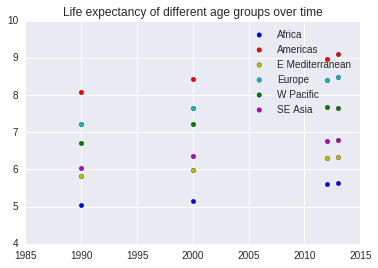

In [28]:
#put in year, numeric value 
fig = plt.figure()
ax1=fig.add_subplot(111)

ax1.scatter(afdf.YEAR.values,afdf.Numeric.values, c='b', label ='Africa')
ax1.scatter(amdf.YEAR.values, amdf.Numeric.values, c= 'r', label = 'Americas')
ax1.scatter(emdf.YEAR.values, emdf.Numeric.values, c= 'y', label = 'E Mediterranean')
ax1.scatter(eudf.YEAR.values, eudf.Numeric.values, c= 'c', label = 'Europe')
ax1.scatter(wpdf.YEAR.values, wpdf.Numeric.values, c= 'g', label = 'W Pacific')
ax1.scatter(seadf.YEAR.values, seadf.Numeric.values, c= 'm', label = 'SE Asia')
plt.legend()
plt.title('Life expectancy of different age groups over time')
plt.show()

I'm noticing that no matter the age group, most countries are generally increasing in life expectancy and also regions tend to follow the same dispersion/ranking. Africa is always at the bottom, for example. I want to look at other categories and see if there are more change-ups